In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import swifter

The total runtime of this notebook is 5-10 minutes depending on your machine. 

### *Important Constants/Conventions to know*

In [3]:
# Coordinates of the centers of the letters/numbers 
# (in x, y pixels from the top left)
# Starting from middle left and going clockwise
five_coordinates_topleft = [[32, 507], [451, 44], [1131, 222], 
                           [1132, 793], [450, 971]]
six_coordinates_topleft = [[35, 509], [335, 87], [943, 87], 
                          [1245, 509], [944, 928], [334, 928]]
# 3D position of eye in (ADCSmm) measures from bottom left

# Dimensions of the screen (x, y in pixels)
screen_shape = (1280, 1024)

# All cartesian screen measurements are made to have a bottom left
# origin, (not the original top left origin)

# How we calssify the `GazeEventType` output from Tobii Studio
gaze_event_legend = {'Unclassified': np.nan, 'Saccade': 0, 'Fixation': 1}

# Minimum radius thresholds for previous analysis (poster) 
# Previous analysis also used gaze not fixation
five_threshold = 143
six_threshold = 129

# How we classify the *unique* phases (anagrams, calibrations, or black screens)
# PhaseType: blackscreen = -1, calibration = 0, anagram trial = 1
# nLocs: blackscreen = 0, five anagram/calibration = 5, six anagram/calibration = 6

# The columns are renamed at the end 
rename = {'RecordingDate': 'Date', 'GazeEventType': 'EventType', 
          'GazeEventDuration': 'EventDuration',
         'FixationPointX (MCSpx)': 'FixationX', 'FixationPointY (MCSpx)': 'FixationY',
         'GazePointX (MCSpx)': 'GazeX', 'GazePointY (MCSpx)': 'GazeY',
         'EyePosLeftX (ADCSmm)': 'EyePosLeftX', 'EyePosLeftY (ADCSmm)': 'EyePosLeftY',
          'EyePosLeftZ (ADCSmm)': 'EyePosLeftX', 'EyePosRightX (ADCSmm)': 'EyePosRightX',
         'EyePosRightY (ADCSmm)': 'EyePosRightY', 'EyePosRightZ (ADCSmm)': 'EyePosRightZ',
         'Phase': 'PhaseName'}

# PhaseName is the *unique* combination of (participant) ID and MediaName, e.g., 
# 25_HLACK is for participant ID 25, anagram HLACK

Show locations of the five and six coordinates 

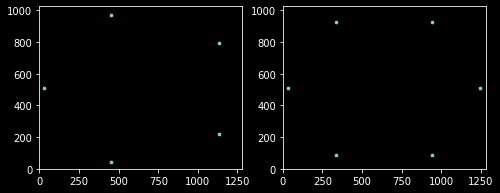

In [4]:
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.scatter(np.array(five_coordinates_topleft).T[0], 
            np.array(five_coordinates_topleft).T[1], s=7)
ax1.set(xlim=(0, screen_shape[0]), ylim=(0, screen_shape[1]))
ax1.set_aspect('equal', adjustable='box')
ax2.scatter(np.array(six_coordinates_topleft).T[0], 
            np.array(six_coordinates_topleft).T[1], s=7)
ax2.set(xlim=(0, screen_shape[0]), ylim=(0, screen_shape[1]))
ax2.set_aspect('equal', adjustable='box');

### Load the (cleaned) data

In [5]:
df = pd.read_csv('../data/fall_2019_cleaned_total_participant_data.csv')

In [6]:
df

,ParticipantName,RecordingDate,MediaName,RecordingTimestamp,FixationIndex,GazeEventType,GazeEventDuration,FixationPointX (MCSpx),FixationPointY (MCSpx),GazePointX (MCSpx),...,EyePosLeftY (ADCSmm),EyePosLeftZ (ADCSmm),EyePosRightX (ADCSmm),EyePosRightY (ADCSmm),EyePosRightZ (ADCSmm),ValidityLeft,ValidityRight,PupilLeft,PupilRight,SaccadeIndex
0,P01,11/4/2019,NaN,12.0,NaN,Unclassified,8.0,NaN,NaN,NaN,...,133.73,589.20,200.72,130.35,591.33,0.0,0.0,5.49,5.38,NaN
1,P01,11/4/2019,NaN,29.0,1.0,Fixation,733.0,NaN,NaN,NaN,...,133.75,589.23,200.71,130.36,591.30,0.0,0.0,5.49,5.38,NaN
2,P01,11/4/2019,NaN,46.0,1.0,Fixation,733.0,NaN,NaN,NaN,...,133.75,589.19,200.70,130.34,591.16,0.0,0.0,5.48,5.39,NaN
3,P01,11/4/2019,NaN,62.0,1.0,Fixation,733.0,NaN,NaN,NaN,...,133.73,589.12,200.70,130.32,591.12,0.0,0.0,5.49,5.38,NaN
4,P01,11/4/2019,NaN,79.0,1.0,Fixation,733.0,NaN,NaN,NaN,...,133.68,588.97,200.72,130.33,591.22,0.0,0.0,5.47,5.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709812,P29,12/6/2019,NaN,730976.0,NaN,Saccade,50.0,NaN,NaN,NaN,...,148.53,642.53,205.62,152.71,641.67,0.0,0.0,4.25,3.94,2294.0
1709813,P29,12/6/2019,NaN,730993.0,NaN,Saccade,50.0,NaN,NaN,NaN,...,148.64,642.97,206.17,152.90,642.30,0.0,0.0,4.33,3.97,2294.0
1709814,P29,12/6/2019,NaN,731010.0,NaN,Saccade,50.0,NaN,NaN,NaN,...,148.76,643.35,206.63,153.07,642.97,0.0,0.0,4.30,3.97,2294.0
1709815,P29,12/6/2019,NaN,731026.0,NaN,Unclassified,25.0,NaN,NaN,NaN,...,148.62,642.96,206.69,152.96,642.69,0.0,0.0,4.37,4.00,NaN


### Get the data types just right

#### Fill nan with np.nan 
This doesn't appear to do anything :(

In [7]:
df.fillna(np.nan, inplace=True)

#### Convert 'Gaze Event Types' to Numbers

In [8]:
df['GazeEventType'].unique()

array(['Unclassified', 'Fixation', 'Saccade'], dtype=object)

In [9]:
gaze_event_legend = {'Unclassified': np.nan, 'Saccade': 0, 'Fixation': 1}

df['GazeEventType'] = df['GazeEventType'].map(lambda entry: gaze_event_legend[entry])

#### Convert 'Participant Name' to ID number

In [10]:
df.ParticipantName.unique()

array(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P22', 'P17', 'P18',
       'P20', 'P21', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29'],
      dtype=object)

In [11]:
participant_id_legend = {par: int(par[1:]) for par in df.ParticipantName.unique()}

df['ParticipantName'] = df['ParticipantName'].map(lambda entry: participant_id_legend[entry])

df.rename(columns={'ParticipantName': 'ID'}, inplace=True)

#### Data types look good

In [12]:
df.dtypes

ID                          int64
RecordingDate              object
MediaName                  object
RecordingTimestamp        float64
FixationIndex             float64
GazeEventType             float64
GazeEventDuration         float64
FixationPointX (MCSpx)    float64
FixationPointY (MCSpx)    float64
GazePointX (MCSpx)        float64
GazePointY (MCSpx)        float64
DistanceLeft              float64
DistanceRight             float64
EyePosLeftX (ADCSmm)      float64
EyePosLeftY (ADCSmm)      float64
EyePosLeftZ (ADCSmm)      float64
EyePosRightX (ADCSmm)     float64
EyePosRightY (ADCSmm)     float64
EyePosRightZ (ADCSmm)     float64
ValidityLeft              float64
ValidityRight             float64
PupilLeft                 float64
PupilRight                float64
SaccadeIndex              float64
dtype: object

### Drop the NaN Media Names
These are confirmed (in the below cell) to be the tiny intervals of time before and after the media show up on the screen 

In [13]:
parID = np.random.choice(df.ID.unique())
# This is the only way to get the NaN
print(df.loc[df.MediaName != df.MediaName].loc[
    df.ID == parID].RecordingTimestamp.diff().to_list())

[nan, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 75394.0, 17.0, 104189.0, 16.0, 17.0, 16154.0, 17.0, 17.0, 16.0, 17.0, 216506.0, 17.0, 16.0, 17.0, 17.0, 41519.0, 16.0, 17.0, 17.0, 134083.0, 17.0, 17.0, 16.0, 19769.0, 17.0, 16.0, 17.0, 62953.0, 17.0, 218720.0, 17.0, 17.0, 17.0, 1482.0, 16.0, 17.0, 833.0, 16.0, 17.0, 583.0, 16.0, 17.0, 500.0, 17.0, 16.0, 17.0, 16.0, 35724.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 17.0, 16.0, 17.0, 16.0, 17.0]


In [14]:
# Collisions of NaN MediaName and NaN ParticipntName
df.loc[(df.MediaName != df.MediaName) & (df.ID != df.ID)].size

0

In [15]:
df = df.loc[df.MediaName == df.MediaName]

In [16]:
# Drop the first three participant data, because 
# we started switching immediately to the next stimulus
# from the fourth participant
df = df.loc[~df.ID.isin([1, 2, 3])]

### Drop the skipped trials/phases

Explore the duration of each trial/calibration/break (phase). These are in milliseconds, e.g. 2000.0 = 2 seconds.

In [17]:
grouped_timestamp = df.groupby(['ID', 'MediaName'])

In [18]:
grouped_timestamp_series = pd.Series(grouped_timestamp.RecordingTimestamp.max(
                        ) - grouped_timestamp.RecordingTimestamp.min())

In [19]:
pd.DataFrame(grouped_timestamp_series)

RecordingTimestamp
ID MediaName                                  
4  6_anagram_123456_1.tiff             33758.0
   6_anagram_123456_2.tiff             16138.0
   anagram_AECJKT.tiff                  1382.0
   anagram_ATEYRB.tiff                216422.0
   anagram_DIEMAR.tiff                214924.0
...                                        ...
29 anagram_PEOWR.tiff                   4196.0
   anagram_RCTUO.tiff                   5929.0
   anagram_REABYT.tiff                165344.0
   anagram_RNOBW.tiff                   4697.0
   anagram_TDMSOE.tiff                 95546.0

[378 rows x 1 columns]

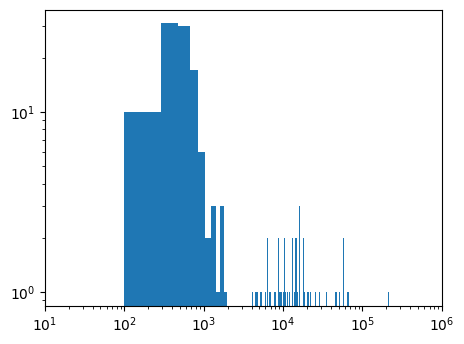

In [20]:
plt.style.use('default')
plt.figure(figsize=(0.8*6.4, 0.8*4.8))
plt.hist(list(dict(grouped_timestamp_series).values()), bins=5_000);
plt.yscale('log')
plt.xscale('log')
plt.xlim(10, 1_000_000);

In [21]:
pd.set_option('display.max_rows', 30)
grouped_timestamp_series.sort_values()[90:120]

ID  MediaName              
11  anagram_PMEKUA.tiff         883.0
15  anagram_UPATEN.tiff         949.0
17  anagram_AEKUMP.tiff         966.0
23  anagram_TOSMDE.tiff         983.0
26  anagram_MPKUAE.tiff        1082.0
10  anagram_EMDSTO.tiff        1099.0
22  anagram_PMUKAE.tiff        1349.0
9   anagram_NAUETP.tiff        1366.0
4   anagram_AECJKT.tiff        1382.0
5   anagram_EATYBR.tiff        1433.0
12  anagram_PMEAUK.tiff        1633.0
15  6_anagram_123456_2.tiff    1665.0
11  anagram_TRBYEA.tiff        1782.0
21  Black Screen.jpg           1882.0
29  anagram_PEOWR.tiff         4196.0
21  6_anagram_123456_2.tiff    4530.0
29  anagram_RNOBW.tiff         4697.0
11  anagram_BNRWO.tiff         5329.0
29  anagram_RCTUO.tiff         5929.0
9   anagram_BOWRN.tiff         6395.0
29  anagram_DWLEFA.tiff        6428.0
10  anagram_NBWRO.tiff         6812.0
29  anagram_HLCKA.tiff         6878.0
11  anagram_PRWOE.tiff         7694.0
23  anagram_HKACL.tiff         7961.0
9   anagram_DLEFWA.tif

#### Keep media of more than 2000 ms or 2 seconds (not skipped)

In [22]:
df = grouped_timestamp.filter(lambda x: 
        x.RecordingTimestamp.max() - x.RecordingTimestamp.min() > 2000)

### Check how the cartesian coordinates look

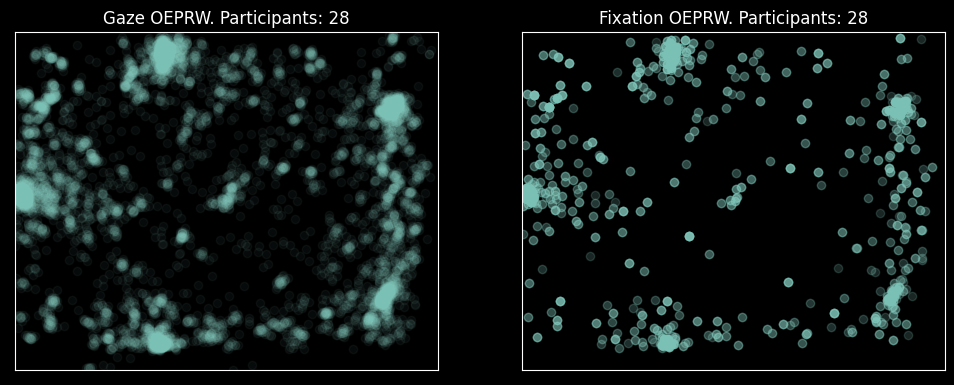

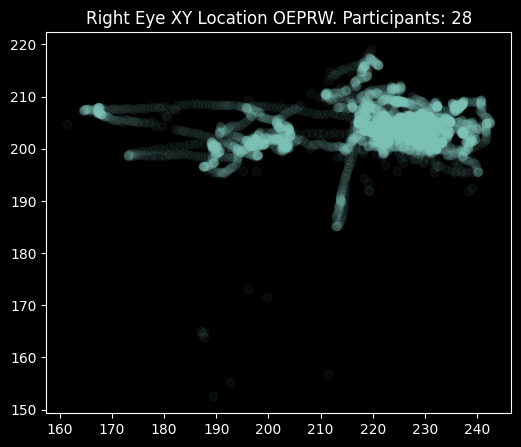

In [23]:
m = np.random.choice(df.MediaName.unique())
dfm = df.loc[df.MediaName == m]
title_rest = m.rstrip('.tiff').lstrip('anagram_') + \
            '. Participants: ' + ', '.join([str(v) for v in dfm.ID.unique().tolist()])

plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(dfm['GazePointX (MCSpx)'], 1024 - dfm['GazePointY (MCSpx)'], alpha=0.05)
ax1.set(xlim=(0, 1280), ylim=(0, 1024), xticks=(), yticks=(), 
        title='Gaze ' + title_rest)
ax1.set_aspect('equal', adjustable='box')
ax2.scatter(dfm['FixationPointX (MCSpx)'], 1024 - dfm['FixationPointY (MCSpx)'], alpha=0.05)
ax2.set(xlim=(0, 1280), ylim=(0, 1024), xticks=(), yticks=(), 
        title='Fixation ' + title_rest)
ax2.set_aspect('equal', adjustable='box')
plt.show()
plt.figure(figsize=(6, 6))
plt.title('Right Eye XY Location ' + title_rest)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(dfm['EyePosRightX (ADCSmm)'],dfm['EyePosRightY (ADCSmm)'], alpha=0.05)
plt.show()

In [24]:
# plt.style.use('dark_background')
# for m in df.MediaName.unique():
#     dfm = df.loc[df.MediaName == m]
#     plt.figure(figsize=(12, 12))
#     plt.xlim(0, 1280)
#     plt.ylim(0, 1024)
#     plt.title(m.rstrip('.tiff').lstrip('anagram') + 
#               ' Participants: ' + ' '.join([str(v) for v in dfm.ID.unique().tolist()]))
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.scatter(dfm['GazePointX (MCSpx)'], 1024 - dfm['GazePointY (MCSpx)'], alpha=0.05)
# #     plt.savefig('gaze_points/' + m + '.png', dpi=200)
#     plt.show()

### Combine participant and media to get each unique *phase*
Combine participant-media to get each unique trial/calibration/break image (call it phase). 
And make `MediaName` a bit more digestible as well.

In [25]:
def strip_media(entry):
    return entry.lstrip('6_anagram_').lstrip('5_anagram_'
            ).lstrip('anagram_').rstrip('.jpg').rstrip('.tiff'
            ).replace(' Screen', '_Screen')

In [26]:
df.MediaName = df.MediaName.map(strip_media)

In [27]:
df = df.assign(Phase = df.ID.astype('str') + '_' + df.MediaName)

In [28]:
df.MediaName.unique()

array(['123456_1', 'LAEFDW', 'ELCSDO', 'DIEMAR', 'INOJRU', 'ATEYRB',
       'TNPUAE', '123456_2', '12345', 'CLHKA', 'ROEPW', 'BWRNO', 'TORCU',
       'Black_Screen', 'DLEFAW', 'OESLDC', 'DEMIAR', 'HKCAL', 'WRPEO',
       'ROTCU', 'LDFAEW', 'EODLSC', 'IMEARD', 'NOUJIR', 'ABRYET', 'LCAKH',
       'ORWPE', 'ONRWB', 'ORUCT', 'AELDWF', 'LSODCE', 'AKHLC', 'ORPWE',
       'OWRNB', 'UORCT', 'FLEADW', 'SCOELD', 'IEDRAM', 'URJNOI', 'CKAHL',
       'EWPRO', 'BOWRN', 'OTCUR', 'DLEFWA', 'ECDOSL', 'DEMAIR', 'RNJIOU',
       'BERYTA', 'CALHK', 'PWROE', 'NBWRO', 'CTUOR', 'ADWFEL', 'LDOCES',
       'RIAMED', 'UIOJNR', 'HLCAK', 'PRWOE', 'BNRWO', 'CUTOR', 'LWFADE',
       'ECSDOL', 'RAEIDM', 'IJNROU', 'KHLCA', 'RWOEP', 'ROTUC', 'ADLWEF',
       'CDOELS', 'DIMEAR', 'KAHLC', 'OEPWR', 'ORWBN', 'OUTCR', 'AWFELD',
       'OELCSD', 'ARMEDI', 'OJIURN', 'LHAKC', 'OEWPR', 'WRONB', 'UCTOR',
       'WLFEAD', 'SDOELC', 'AIRDEM', 'IJOUNR', 'HAKCL', 'OWRPE', 'NOBWR',
       'RUCTO', 'EFADLW', 'DLSEOC', 'RAIEDM', 'RIJN

In [29]:
phase_min_timestamp = dict(df.groupby('Phase').RecordingTimestamp.min())

In [30]:
%%time
df = df.assign(Timestamp = df.swifter.allow_dask_on_strings().apply(lambda row: 
            row['RecordingTimestamp'] - phase_min_timestamp[row['Phase']], 
                 axis=1))


CPU times: user 2.31 s, sys: 1.54 s, total: 3.86 s
Wall time: 10.9 s


In [31]:
phase_min_fixation_index = dict(df.groupby('Phase').FixationIndex.min())

In [32]:
%%time
# add 1 so that it starts with 1 (first fixation detected) not 0 for each phase
df = df.assign(FixationN = df.swifter.allow_dask_on_strings().apply(lambda row: 
            row['FixationIndex'] - phase_min_fixation_index[row['Phase']] + 1, 
                 axis=1))


CPU times: user 2.34 s, sys: 1.06 s, total: 3.4 s
Wall time: 10.9 s


In [33]:
phase_min_saccade_index = dict(df.groupby('Phase').SaccadeIndex.min())

In [34]:
%%time
# add 1 so that it starts with 1 (first saccade detected) not 0 for each phase
df = df.assign(SaccadeN = df.swifter.allow_dask_on_strings().apply(lambda row: 
            row['SaccadeIndex'] - phase_min_saccade_index[row['Phase']] + 1, 
                 axis=1))


CPU times: user 2.37 s, sys: 1.05 s, total: 3.42 s
Wall time: 10.1 s


In [35]:
# Drop the columns normalized to the overall recording
df = df.drop(columns={'RecordingTimestamp', 'FixationIndex', 'SaccadeIndex'})

### Convert all coordinates to bottom left origin
Convert to xy from bottom left (do the same with the coordinates of the letters) 

In [36]:
five_coordinates_bottomleft = [(x, 1024 - y) for x, y in five_coordinates_topleft]
six_coordinates_bottomleft = [(x, 1024 - y) for x, y in six_coordinates_topleft]

In [37]:
print(five_coordinates_bottomleft)
print(six_coordinates_bottomleft)

[(32, 517), (451, 980), (1131, 802), (1132, 231), (450, 53)]
[(35, 515), (335, 937), (943, 937), (1245, 515), (944, 96), (334, 96)]


In [38]:
df['FixationPointY (MCSpx)'] = 1024 - df['FixationPointY (MCSpx)']
df['GazePointY (MCSpx)'] = 1024 - df['GazePointY (MCSpx)']

### Get the polar coordinates and identify of the nearest letter/number location center

Get the polar coordinates to the nearest letter/number, along with an identification of the letter/number (1 through 5 or 1 through 6 going middle left clockwise). Do this for both gaze and fixation. 

In [39]:
five_x_bottomleft = np.array([coord[0] for coord in five_coordinates_bottomleft])
five_y_bottomleft = np.array([coord[1] for coord in five_coordinates_bottomleft])

six_x_bottomleft = np.array([coord[0] for coord in six_coordinates_bottomleft])
six_y_bottomleft = np.array([coord[1] for coord in six_coordinates_bottomleft])

In [40]:
def gaze_polar_location_info(row):
    # Only difference with fixation function
    x, y = row['GazePointX (MCSpx)'], row['GazePointY (MCSpx)']  
    
    if (row['MediaName'] == '12345') or (
                        len(row['MediaName']) == 5 and row['MediaName'].isalpha()):
        distances = np.sqrt((x - five_x_bottomleft)**2 + (y - five_y_bottomleft)**2)
        r, idx = distances.min(), distances.argmin()
        theta = np.arctan2(x - five_x_bottomleft[idx], 
                           y - five_y_bottomleft[idx]) * 180 / np.pi
        return idx+1, r, theta
    
    elif (row['MediaName'] in ['123456_1', '123456_2']) or (
                            len(row['MediaName']) == 6 and row['MediaName'].isalpha()):
        distances = np.sqrt((x - six_x_bottomleft)**2 + (y - six_y_bottomleft)**2)
        r, idx = distances.min(), distances.argmin()
        theta = np.arctan2(x - six_x_bottomleft[idx], 
                           y - six_y_bottomleft[idx]) * 180 / np.pi
        return idx+1, r, theta
        
    else:
        return np.nan, np.nan, np.nan

##### Caution: This takes a long time 
(Two minutes on my computer)

In [41]:
%%time
# Parallelization is not possible unfortunately
gaze_polar = df.apply(gaze_polar_location_info, axis=1)

CPU times: user 2min 2s, sys: 1.55 s, total: 2min 4s
Wall time: 2min 3s


In [42]:
gaze_polar = pd.DataFrame(gaze_polar.tolist(), index=gaze_polar.index, 
                            columns=['GazeLoc', 'GazeR', 'GazeTheta'])
df = df.join(gaze_polar)

#### Do the same for fixation

In [43]:
def fixation_polar_location_info(row):
    """This function is identical to `gaze_polar_location_info`, 
    only the `x, y` are fixation not gaze."""
    
    # Only difference with gaze function
    x, y = row['FixationPointX (MCSpx)'], row['FixationPointY (MCSpx)']
    
    if (row['MediaName'] == '12345') or (
                        len(row['MediaName']) == 5 and row['MediaName'].isalpha()):
        distances = np.sqrt((x - five_x_bottomleft)**2 + (y - five_y_bottomleft)**2)
        r, idx = distances.min(), distances.argmin()
        theta = np.arctan2(x - five_x_bottomleft[idx], 
                           y - five_y_bottomleft[idx]) * 180 / np.pi
        return idx+1, r, theta
    
    elif (row['MediaName'] in ['123456_1', '123456_2']) or (
                            len(row['MediaName']) == 6 and row['MediaName'].isalpha()):
        distances = np.sqrt((x - six_x_bottomleft)**2 + (y - six_y_bottomleft)**2)
        r, idx = distances.min(), distances.argmin()
        theta = np.arctan2(x - six_x_bottomleft[idx], 
                           y - six_y_bottomleft[idx]) * 180 / np.pi
        return idx+1, r, theta
        
    else:
        return np.nan, np.nan, np.nan

In [44]:
%%time
# Parallelization is not possible unfortunately
fixation_polar = df.apply(fixation_polar_location_info, axis=1)

CPU times: user 2min 6s, sys: 1.74 s, total: 2min 7s
Wall time: 2min 7s


In [45]:
fixation_polar = pd.DataFrame(fixation_polar.tolist(), index=fixation_polar.index, 
                            columns=['FixationLoc', 'FixationR', 'FixationTheta'])
df = df.join(fixation_polar)

### Check how the polar coordinates look

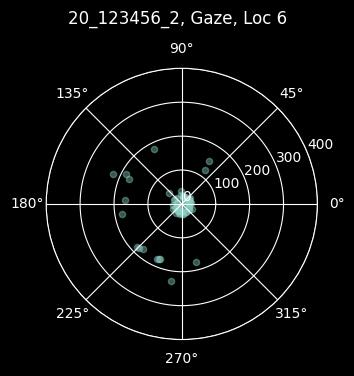

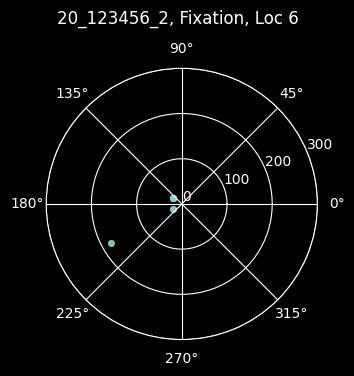

In [46]:
for i in range(1):
    p = np.random.choice(df.Phase.unique())
    loc = np.random.randint(1, 7) # 6 won't work for 5 letter words
    
    eyetype = 'Gaze'
    dfp = df.loc[(df['Phase'] == p) & (df[eyetype + 'Loc'] == loc)]
    plt.style.use('dark_background')
    
    
    fig = plt.figure(figsize=(3.5, 4))
    fig.suptitle(p + ', {}, Loc {}'.format(eyetype, loc))
    ax = fig.add_subplot(111, projection='polar')
    ax.set_rlim(0, 400)
    ax.set_rticks(np.arange(0, 500, 100))
    c = ax.scatter(dfp[eyetype + 'Theta'], dfp[eyetype + 'R'], alpha=0.4, s=20)
    plt.show()
    
    eyetype = 'Fixation'
    dfp = df.loc[(df['Phase'] == p) & (df[eyetype + 'Loc'] == loc)]
    fig = plt.figure(figsize=(3.5, 4))
    fig.suptitle(p + ', {}, Loc {}'.format(eyetype, loc))
    ax = fig.add_subplot(111, projection='polar')
    ax.set_rlim(0, 300)
    ax.set_rticks(np.arange(0, 400, 100))
    c = ax.scatter(dfp[eyetype + 'Theta'], dfp[eyetype + 'R'], alpha=0.2, s=15)
    plt.show()

In [47]:
# There's sometimes disagreement between fixation and gaze
# which is to be expected
df.loc[df.FixationLoc != df.GazeLoc].FixationLoc.value_counts()

1.0    225688
5.0      4656
2.0      3215
3.0      2223
4.0      2123
6.0      1960
Name: FixationLoc, dtype: int64

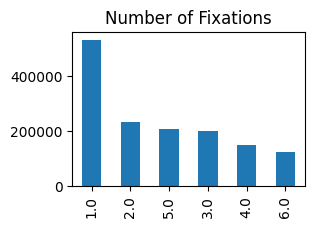

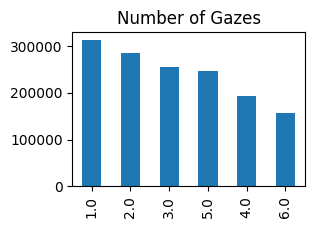

In [48]:
plt.style.use('default')
plt.figure(figsize=(3, 2))
plt.title('Number of Fixations')
df.FixationLoc.value_counts().plot(kind='bar')
plt.show()
plt.figure(figsize=(3, 2))
plt.title('Number of Gazes')
df.GazeLoc.value_counts().plot(kind='bar')
plt.show()

In [49]:
# Location 1 has more fixations/gazes, maybe because the experimenter 
# is sitting on the left?
df.FixationLoc.value_counts()

1.0    534257
2.0    233088
5.0    207194
3.0    201467
4.0    149809
6.0    124650
Name: FixationLoc, dtype: int64

When the gazeR or FixationR is `NaN`, the min idx was automatically set to 0, leading the FixationLoc to be set to 1, this explains why 1 was so frequent. 

In [51]:
df.loc[df.FixationR != df.FixationR].FixationLoc.unique()

array([ 1., nan])

In [58]:
df.FixationLoc = df.swifter.allow_dask_on_strings().apply(
                lambda row: np.nan if row.FixationR != row.FixationR else row.FixationLoc, 
                    axis=1)

In [59]:
df.GazeLoc = df.swifter.allow_dask_on_strings().apply(
                lambda row: np.nan if row.GazeR != row.GazeR else row.GazeLoc, 
                    axis=1)

### Create `PhaseType` and `nLocs`
`PhaseType`: blackscreen = -1, calibration = 0, anagram trial = 1

`nLocs`: blackscreen = 0, five anagram/calibration = 5, six anagram/calibration = 6

In [61]:
def get_phasetype(entry):
    if entry in ['123456_1', '123456_2', '12345']:
        return 0
    elif entry == 'Black_Screen':
        return -1
    else:
        return 1

In [62]:
def get_nlocs(entry):
    if (entry =='12345') or (
            len(entry) == 5 and entry.isalpha()):
        return 5
    elif (entry in ['123456_1', '123456_2']) or (
            len(entry) == 6 and entry.isalpha()):
        return 6
    else:
        return 0                       

In [63]:
df = df.assign(PhaseType=df.MediaName.map(get_phasetype), 
               nLocs=df.MediaName.map(get_nlocs))

In [64]:
df = df.rename(columns={'FixationNumber': 'FixationN', 'SaccadeNumber': 'SaccadeN'})

### Rename the columns for final export

In [65]:
rename = {'RecordingDate': 'Date', 'GazeEventType': 'EventType', 
          'GazeEventDuration': 'EventDuration',
         'FixationPointX (MCSpx)': 'FixationX', 'FixationPointY (MCSpx)': 'FixationY',
         'GazePointX (MCSpx)': 'GazeX', 'GazePointY (MCSpx)': 'GazeY',
         'EyePosLeftX (ADCSmm)': 'EyePosLeftX', 'EyePosLeftY (ADCSmm)': 'EyePosLeftY',
          'EyePosLeftZ (ADCSmm)': 'EyePosLeftX', 'EyePosRightX (ADCSmm)': 'EyePosRightX',
         'EyePosRightY (ADCSmm)': 'EyePosRightY', 'EyePosRightZ (ADCSmm)': 'EyePosRightZ',
         'Phase': 'PhaseName'}

In [66]:
df = df.rename(columns=rename)

In [67]:
df.columns

Index(['ID', 'Date', 'MediaName', 'EventType', 'EventDuration', 'FixationX',
       'FixationY', 'GazeX', 'GazeY', 'DistanceLeft', 'DistanceRight',
       'EyePosLeftX', 'EyePosLeftY', 'EyePosLeftX', 'EyePosRightX',
       'EyePosRightY', 'EyePosRightZ', 'ValidityLeft', 'ValidityRight',
       'PupilLeft', 'PupilRight', 'PhaseName', 'Timestamp', 'FixationN',
       'SaccadeN', 'GazeLoc', 'GazeR', 'GazeTheta', 'FixationLoc', 'FixationR',
       'FixationTheta', 'PhaseType', 'nLocs'],
      dtype='object')

### Export prepared data 

In [68]:
dfprepared = df.copy()

In [69]:
dfprepared.to_csv('../data/fall_2019_cleaned_prepared_total_participant_data.csv', 
                  index=False)